# Análise Exploratória de Dados (EDA) do Banco Europeu
### Problema a ser resolvido:

O problema a ser resolvido neste projeto é a identificação dos principais fatores que levam ao churn dos clientes e o desenvolvimento de estratégias eficazes para reduzir essa taxa de saída. Utilizando a base de dados do banco, o objetivo é responder às seguintes perguntas:

1. Quais são os fatores mais relevantes que influenciam os clientes a deixarem o banco? 

2. Há algum padrão específico em relação à idade, aos produtos comprados ou ao nível de atividade dos clientes do banco?

3. Existem padrões específicos relacionados a localização geográfica ou perfil demográfico?

4. Como o comportamento dos clientes que deixam o banco se diferencia daqueles que permanecem?

5. Quais características devem ser destacadas ao planejar estratégias de retenção e quais ações específicas podem ser adotadas pelo Banco Europeu?


Neste notebook, iremos realizar a EDA desse projeto, buscando obter os insights valiosos requisitados pelo Banco Europeu.

In [281]:
# É necessário importar as biliotecas que serão úteis para a análise exploratória.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np


In [282]:
# Importando a base de dados atualizada (pós tratamento).
base_atualizada = pd.read_csv('BASE_FINAL.csv')

### Análise Exploratória

Agora, realizaremos uma análise exploratória dos dados, dividindo-a em etapas para garantir uma investigação mais estruturada. No primeiro passo, faremos uma análise geral do case, com o objetivo de identificar padrões e insights iniciais. Nas etapas seguintes, iremos aprofundar em aspectos mais específicos, como o impacto de variáveis numéricas e categóricas, buscando correlações relevantes que possam influenciar nos resultados de churn e retenção. Ao final de cada tópico, geraremos gráficos para obter mais informações sobre o case e obter insights adicionais.


In [283]:
# Verificação da base de dados.
base_atualizada.head()

,Id Cliente,Sobrenome,Pontuacao Credito,Pais,Genero,Idade,Tempo De Vinculo,Saldo,Numero De Produtos,Possui Cartao Credito,Membro Ativo,Salario Estimado,Saiu
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [284]:
# Excluindo colunas que não serão necessárias.
base_atualizada.drop(columns=['Id Cliente'], inplace= True)
base_atualizada.drop(columns = ['Sobrenome'], inplace = True ) 
base_atualizada.head()

,Pontuacao Credito,Pais,Genero,Idade,Tempo De Vinculo,Saldo,Numero De Produtos,Possui Cartao Credito,Membro Ativo,Salario Estimado,Saiu
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [285]:
# Verificação das informações gerais da base atualizada.
base_atualizada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pontuacao Credito      10000 non-null  int64  
 1   Pais                   10000 non-null  object 
 2   Genero                 10000 non-null  object 
 3   Idade                  10000 non-null  int64  
 4   Tempo De Vinculo       10000 non-null  int64  
 5   Saldo                  10000 non-null  float64
 6   Numero De Produtos     10000 non-null  int64  
 7   Possui Cartao Credito  10000 non-null  int64  
 8   Membro Ativo           10000 non-null  int64  
 9   Salario Estimado       10000 non-null  float64
 10  Saiu                   10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [286]:
# Verificação estatística do Dataframe.
base_atualizada.describe()

,Pontuacao Credito,Idade,Tempo De Vinculo,Saldo,Numero De Produtos,Possui Cartao Credito,Membro Ativo,Salario Estimado,Saiu
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Dicionário dos Dados
- Pontuação Crédito: Pontuação de crédito atribuída ao cliente, que reflete seu histórico de crédito.

- País: Localização geográfica do cliente (país de residência).

- Gênero: Gênero do cliente (masculino ou feminino).

- Idade: Idade do cliente.

- Tempo sendo cliente: Número de anos em que o cliente mantém uma conta no banco.

- Saldo: Saldo disponível na conta do cliente.

- Número De Produtos: Número de produtos ou serviços financeiros que o cliente utiliza no banco.

- Possui Cartão Crédito: Indica se o cliente possui um cartão de crédito emitido pelo banco (1 para sim, 0 para não).


- Membro Ativo: Indica se o cliente é um membro ativo, ou seja, utiliza regularmente os serviços do banco (1 para sim, 0 para não).

- Salário Estimado: Estimativa do salário anual do cliente.

- Saiu: Indica se o cliente saiu do banco (1 para sim, 0 para não).

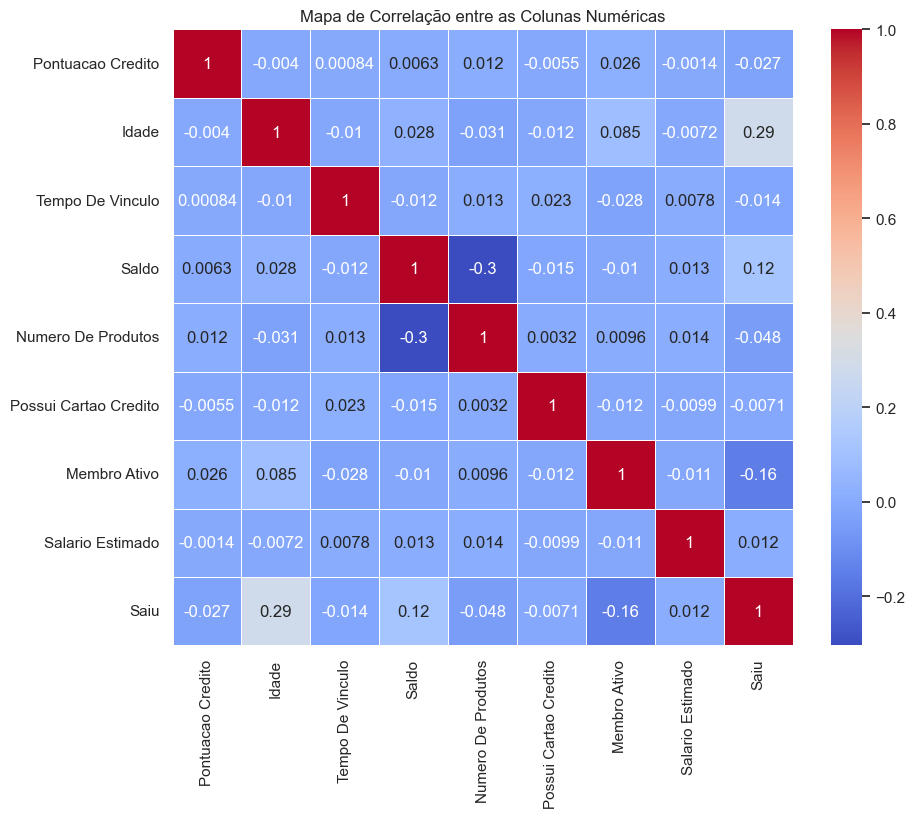

In [287]:
# Gerando o mapa de correlação da 'base_atualizada'.

# Selecionar apenas colunas numéricas.
colunas_numericas = base_atualizada.select_dtypes(include=['float64', 'int64'])

# Inicializar o MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Aplicar a escala min-max em todas as colunas numéricas do DataFrame
base_final_scaled = scaler.fit_transform(colunas_numericas)

# Calcular a correlação entre as colunas numéricas
correlacao = pd.DataFrame(base_final_scaled, columns=colunas_numericas.columns).corr()

# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 8))

# Criar o mapa de calor
sns.heatmap(correlacao, annot=True, cmap='coolwarm', linewidths=0.5)

# Título do gráfico
plt.title('Mapa de Correlação entre as Colunas Numéricas')

# Mostrar o gráfico
plt.show()

### Insights Sobre a Correlação das Variáveis Numéricas.

O foco deste mapa de correlação é com a coluna 'Saiu', pois ela indica se o cliente deixou o serviço ou não, sendo uma variável crucial para entender os padrões de churn. Ao analisar as correlações com essa coluna, podemos identificar quais variáveis possuem maior influência sobre a saída dos clientes.

Quanto mais próximo de 0, mais fraca é a correlação entre as variáveis, indicando pouca ou nenhuma relação linear entre elas. Por outro lado, quanto mais distante de 0 (em direção a -1 ou 1), mais forte é a correlação, com -1 indicando uma correlação negativa perfeita e 1 indicando uma correlação positiva perfeita. Os valores variam de -1 a 1.


Nota-se que, embora não existam correlações fortes entre as variáveis numéricas, é essencial realizar uma investigação mais aprofundada dessas variáveis, pois elas ainda podem revelar insights valiosos para o Banco Europeu.


### 1 - Fatores Relevantes

Vamos explorar as principais correlações identificadas para obter insights valiosos. Para isso, a base de dados será dividida em duas partes: uma representando os clientes que saíram e outra representando os clientes que permaneceram. Com essa segmentação, será possível criar gráficos comparativos que nos ajudarão a visualizar e compreender melhor as variáveis mais significativas que podem ter influenciado o churn. Esses gráficos serão fundamentais para identificar padrões e tendências que contribuíram para a decisão dos clientes de sair ou continuar com a instituição.           

In [288]:
# Divisão da base de dados.
clientes_churn = base_atualizada[base_atualizada['Saiu'] == 1]
clientes_stay = base_atualizada[base_atualizada['Saiu'] == 0]

In [289]:
# Verificação da base 'clientes_churn'.
clientes_churn.head()

,Pontuacao Credito,Pais,Genero,Idade,Tempo De Vinculo,Saldo,Numero De Produtos,Possui Cartao Credito,Membro Ativo,Salario Estimado,Saiu
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


In [290]:
# Verificando a base 'clientes_stay'.
clientes_stay.head()

,Pontuacao Credito,Pais,Genero,Idade,Tempo De Vinculo,Saldo,Numero De Produtos,Possui Cartao Credito,Membro Ativo,Salario Estimado,Saiu
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


Bases devidamente divididas.

C:\Users\victor\AppData\Local\Temp\ipykernel_7564\1421289189.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=clientes_churn['Idade'], label='Churn', shade=True)
C:\Users\victor\AppData\Local\Temp\ipykernel_7564\1421289189.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=clientes_stay['Idade'], label='Stay', shade=True)
C:\Users\victor\AppData\Local\Temp\ipykernel_7564\1421289189.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=clientes_churn['Saldo'], label='Churn', shade=True)
C:\Users\victor\AppData\Local\Temp\ipykernel_7564\1421289189.py:18: FutureWarning: 

`shade` is now deprecated in fav

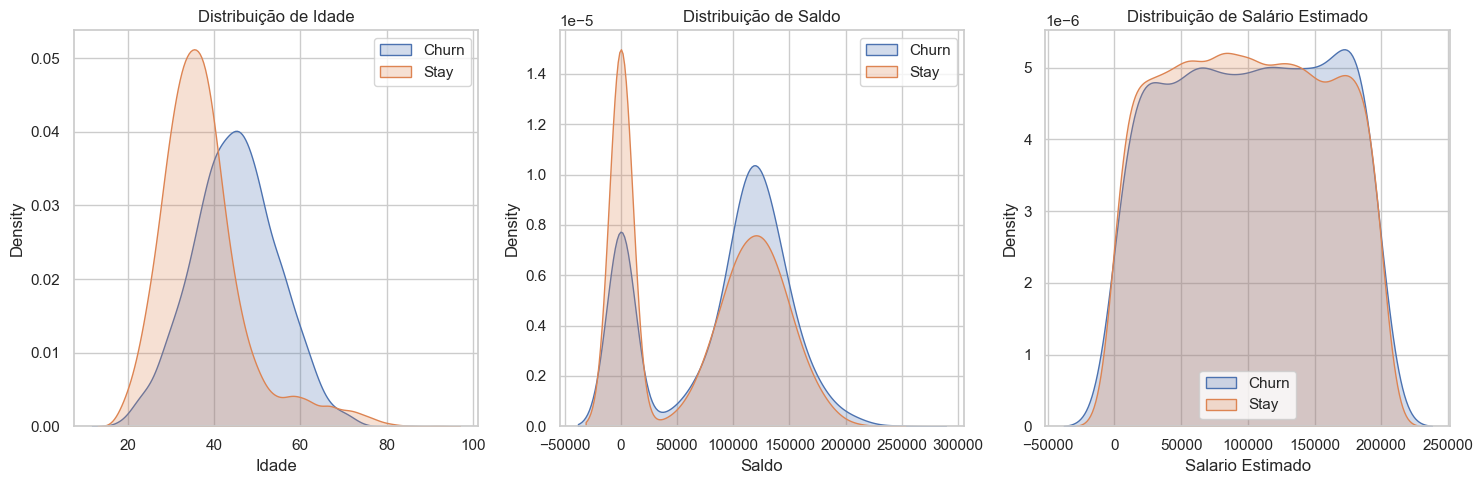

In [291]:
# Gráfico de densidade para entender melhor as variáveis numéricas.

# Filtrar os clientes que saíram e os que ficaram

# Comparar a densidade de variáveis numéricas entre churn e stay
plt.figure(figsize=(15, 5))

# Densidade de Idade
plt.subplot(1, 3, 1)
sns.kdeplot(data=clientes_churn['Idade'], label='Churn', shade=True)
sns.kdeplot(data=clientes_stay['Idade'], label='Stay', shade=True)
plt.title('Distribuição de Idade')
plt.legend()

# Densidade de Saldo
plt.subplot(1, 3, 2)
sns.kdeplot(data=clientes_churn['Saldo'], label='Churn', shade=True)
sns.kdeplot(data=clientes_stay['Saldo'], label='Stay', shade=True)
plt.title('Distribuição de Saldo')
plt.legend()

# Densidade de Salário Estimado
plt.subplot(1, 3, 3)
sns.kdeplot(data=clientes_churn['Salario Estimado'], label='Churn', shade=True)
sns.kdeplot(data=clientes_stay['Salario Estimado'], label='Stay', shade=True)
plt.title('Distribuição de Salário Estimado')
plt.legend()

plt.tight_layout()
plt.show()


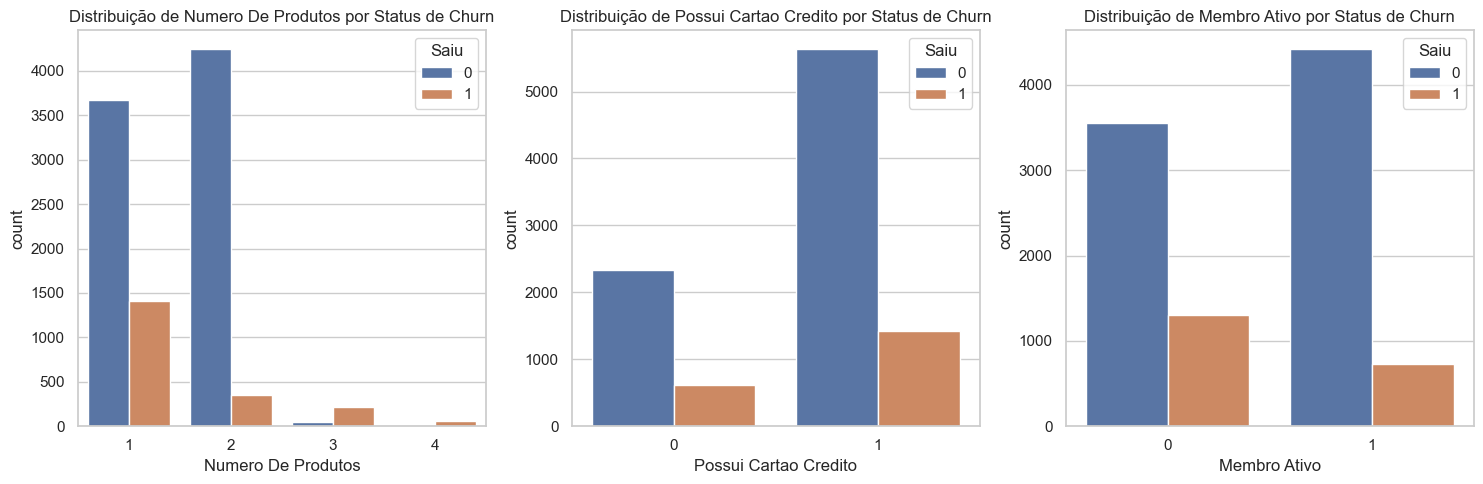

In [292]:
# Gerando gráficos para entender melhor as variáveis numéricas.


# Variáveis categóricas para comparar
variaveis_numericas = ['Numero De Produtos', 'Possui Cartao Credito', 'Membro Ativo']

# Criar um gráfico de barras para cada variável categórica
plt.figure(figsize=(15, 5))
for i, var in enumerate(variaveis_numericas):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=var, hue='Saiu', data=base_atualizada)
    plt.title(f'Distribuição de {var} por Status de Churn')

plt.tight_layout()
plt.show()

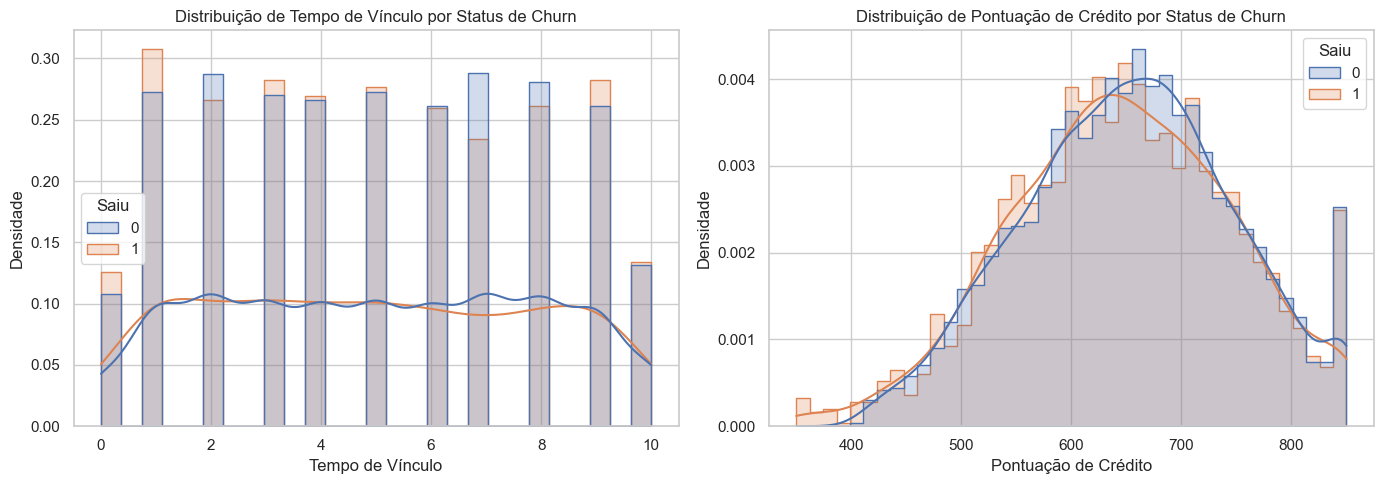

In [293]:
# Gerando gráficos para entender melhor as variáveis numéricas.


# Definindo as variáveis que queremos analisar
variaveis_numericas = ['Tempo De Vinculo', 'Pontuacao Credito']

# Criar a figura com 1 linha e 2 colunas
plt.figure(figsize=(14, 5))

# Criar o primeiro gráfico para "Tempo de Vínculo"
plt.subplot(1, 2, 1)
sns.histplot(data=base_atualizada, x='Tempo De Vinculo', hue='Saiu', kde=True, element='step', stat="density", common_norm=False)
plt.title('Distribuição de Tempo de Vínculo por Status de Churn')
plt.xlabel('Tempo de Vínculo')
plt.ylabel('Densidade')

# Criar o segundo gráfico para "Pontuação de Crédito"
plt.subplot(1, 2, 2)
sns.histplot(data=base_atualizada, x='Pontuacao Credito', hue='Saiu', kde=True, element='step', stat="density", common_norm=False)
plt.title('Distribuição de Pontuação de Crédito por Status de Churn')
plt.xlabel('Pontuação de Crédito')
plt.ylabel('Densidade')

# Ajustar o layout e mostrar os gráficos
plt.tight_layout()
plt.show()


### Principais Insights Extraídos dos Gráficos

- Distribuição de Idade e Churn

Observamos que clientes com idades entre 40 e 60 anos apresentam uma maior taxa de churn, conforme a densidade dos gráficos. Esse grupo etário parece ser mais sensível às mudanças nos serviços do banco ou às suas necessidades financeiras. Uma análise mais aprofundada sobre os motivos específicos que levam esses clientes a sair pode revelar oportunidades para melhorar a retenção.

- Distribuição de Saldo e Churn

A análise do saldo mostra que a retenção é alta para clientes com saldo baixo (próximo de zero). No entanto, o churn aumenta significativamente para clientes com saldo mais elevado. Isso pode indicar que clientes com saldos maiores possuem mais opções de investimento ou não encontram valor suficiente nos produtos oferecidos pelo banco. Estratégias de retenção voltadas para esse grupo, como a oferta de investimentos personalizados, podem ser efetivas.


- Distribuição do Número de Produtos e Churn

Os clientes com 1 ou 2 produtos representam a maior parte da base de clientes. No entanto, vemos que o churn é mais elevado entre clientes com apenas 1 produto, enquanto aqueles com 2 produtos têm uma taxa de retenção significativamente maior. A retenção cai drasticamente para clientes com mais de 2 produtos, especialmente com 4 produtos. Isso pode indicar que o banco não está conseguindo oferecer um portfólio de produtos que continue relevante à medida que o número de produtos cresce.

- Membro Ativo e Churn

Há uma diferença clara entre clientes ativos e não ativos: clientes ativos, que provavelmente utilizam regularmente os serviços do banco, apresentam uma taxa de churn significativamente mais baixa. Isso mostra que manter o cliente envolvido com a instituição é um fator chave para evitar o churn.

- Possuir Cartão de Crédito e Churn

Não há uma correlação evidente entre a posse de cartão de crédito e o churn. Isso indica que, independentemente de terem ou não um cartão de crédito, os clientes exibem comportamentos de churn semelhantes. Portanto, concentrar esforços de retenção apenas nessa variável pode não ser eficaz. É mais adequado direcionar a atenção para outros fatores que influenciam a saída dos clientes..

- Distribuição de Salário Estimado e Churn

Não há uma relação clara entre o salário estimado e o churn. Isso sugere que, independentemente do nível salarial, os clientes apresentam comportamento de churn similar. Logo, esforços de retenção com base apenas no salário podem não ser eficazes. Focar em outros fatores seria mais apropriado.

- Distribuição de Pontuação em Crédito por Status de Churn

A análise da distribuição da pontuação de crédito não revela uma correlação clara entre a pontuação e o churn. Tanto clientes com pontuação de crédito baixa quanto aqueles com pontuação alta mostram comportamento de churn semelhante. Isso sugere que a pontuação de crédito, isoladamente, não é um fator determinante para prever a saída de clientes. Portanto, estratégias de retenção focadas apenas nesse aspecto podem não ser eficazes.

- Distribuição de Tempo de Vínculo por Status de Churn

O gráfico mostra que o tempo de vínculo sozinho não explica diretamente o churn, já que clientes tanto novos quanto antigos estão saindo. Isso aponta para a importância de outros fatores, como a qualidade dos serviços e benefícios oferecidos ao longo do tempo.

### Pontos Principais para Analisar

- Faixa Etária e Churn: Uma análise mais detalhada sobre as diferentes faixas etárias pode revelar necessidades específicas de cada grupo, permitindo a criação de produtos e serviços direcionados.

- Número de Produtos e Churn: Entender melhor a relação entre o número de produtos adquiridos e a permanência dos clientes pode ajudar a identificar estratégias de cross-selling e up-selling, promovendo a adoção de mais produtos pelo mesmo cliente.

- Atividade do Membro e Churn: A atividade do membro, se ele é ativo ou não, mostrou uma relação importante com o churn. Clientes inativos têm maior probabilidade de sair, o que aponta para a necessidade de iniciativas de reengajamento.

- Análise por País e Gênero: Variáveis categóricas como país e gênero podem revelar comportamentos diferenciados entre grupos específicos. Essas informações são valiosas para a personalização de campanhas de marketing e retenção.

### Pontos que Não Vão Ser Explorados

- Relação entre Cartão de Crédito e Churn: A análise não revelou uma correlação clara entre a posse de cartão de crédito e o churn dos clientes. Isso sugere que, no caso desta instituição, a oferta ou uso de cartões de crédito não parece ser um fator decisivo para a retenção ou saída de clientes. Assim, essa variável, embora relevante em outras situações, não se mostrou um indicador importante no contexto atual.

- Distribuição de Salários e Churn: A distribuição de salários entre os clientes não apresentou padrões significativos que justificassem uma investigação mais profunda em relação ao churn. Isso indica que a variação salarial, isoladamente, não é um fator crítico para explicar o comportamento dos clientes em termos de permanência ou saída, podendo ser desconsiderada como um ponto de foco nas estratégias de retenção.

- Distribuição de Pontuação em Crédito e Churn: A distribuição de pontos em crédito não apresentou padrões significativos que justificassem uma investigação mais profunda.

- Distribuição de Tempo de Vínculo por Status de Churn: A análise da distribuição de tempo de vínculo em relação ao status de churn revelou que, embora haja variações, não se observaram correlações claras que indiquem um impacto direto do tempo de vínculo na decisão dos clientes de permanecer ou sair.



In [294]:
# Excluindo colunas que não serão necessárias.
clientes_churn = clientes_churn.drop(columns=['Possui Cartao Credito', 'Salario Estimado', 'Pontuacao Credito','Tempo De Vinculo'])
clientes_stay = clientes_stay.drop(columns=['Possui Cartao Credito', 'Salario Estimado', 'Pontuacao Credito','Tempo De Vinculo'])

# Visualizar as primeiras linhas para verificar o resultado
clientes_churn.head()
clientes_stay.head()


,Pais,Genero,Idade,Saldo,Numero De Produtos,Membro Ativo,Saiu
1,Spain,Female,41,83807.86,1,1,0
3,France,Female,39,0.00,2,0,0
4,Spain,Female,43,125510.82,1,1,0
6,France,Male,50,0.00,2,1,0
8,France,Male,44,142051.07,2,1,0


Torna-se necessário investigar mais a fundo as variáveis que demonstraram correlação significativa com o churn. A análise detalhada dessas variáveis pode revelar padrões ou comportamentos específicos que expliquem a saída dos clientes. Fatores como a faixa etária, número de produtos adquiridos e atividade do membro já se mostraram relevantes, indicando a importância de estratégias direcionadas para esses grupos. Além disso, é essencial explorar possíveis interações entre variáveis, como idade e atividade ou país e gênero para identificar fatores de risco e oportunidades de retenção mais precisas. Com esses insights, será possível desenvolver ações mais efetivas para melhorar a retenção e reduzir o churn.


### 2 - Análise de Churn com Base na Faixa Etária

Nesta seção, vamos examinar as faixas etárias que apresentam maior incidência de churn e retenção de clientes, buscando insights valiosos a partir dessas informações. A análise das faixas etárias nos permitirá entender melhor quais grupos estão mais propensos a deixar o banco e quais segmentos demonstram maior lealdade.

Compreender essas dinâmicas é fundamental para o desenvolvimento de estratégias de retenção mais eficazes e direcionadas. Além disso, identificaremos oportunidades para personalizar ofertas e serviços, aumentando a satisfação do cliente e, consequentemente, reduzindo a taxa de churn.


In [295]:
# Analisando as faixas etárias com maior incidência de churn.

# Agrupando as idades em faixas etárias.
faixa_etaria = pd.cut(clientes_churn['Idade'], bins=[0, 34, 40, 45, 50, 55, 60, 65, 100], right=True, 
                       labels=['Abaixo de 35', '35-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66+'])

# Contar as ocorrências em cada faixa etária
contagem_faixa_etaria = faixa_etaria.value_counts().sort_index()

contagem_faixa_etaria



Idade
Abaixo de 35    290
35-40           396
41-45           394
46-50           394
51-55           269
56-60           179
61-65            80
66+              35
Name: count, dtype: int64


Insight: Observa-se uma maior concentração de churn entre clientes na faixa etária de **35 a 50 anos**. Essa tendência pode indicar que estratégias específicas são necessárias para abordar e reter clientes dentro dessas idades, potencialmente desenvolvendo ofertas ou programas de fidelidade que atendam melhor a esse grupo. 

Para aprofundar essa análise, vamos gerar visualizações gráficas que ajudem a compreender melhor esses padrões.

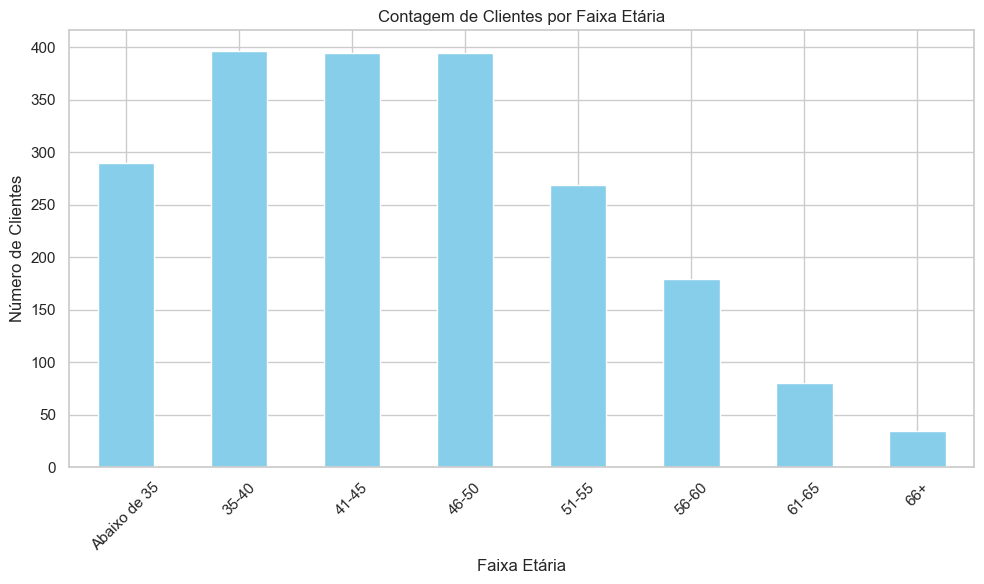

In [296]:
# Visualizando as informações graficamente.

# Criando gráfico de barras
plt.figure(figsize=(10, 6))
contagem_faixa_etaria.plot(kind='bar', color='skyblue')

# Adicionando título e rótulos
plt.title('Contagem de Clientes por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Clientes')

# Exibir gráfico
plt.xticks(rotation=45)
plt.tight_layout()  # Ajustar layout
plt.show()


Insight: **A partir dos 51 anos, observa-se uma queda gradual no número de churns**. Isso pode indicar que os clientes mais velhos tendem a ser mais fiéis, possivelmente devido a hábitos de uso ou menos disposição para mudanças.

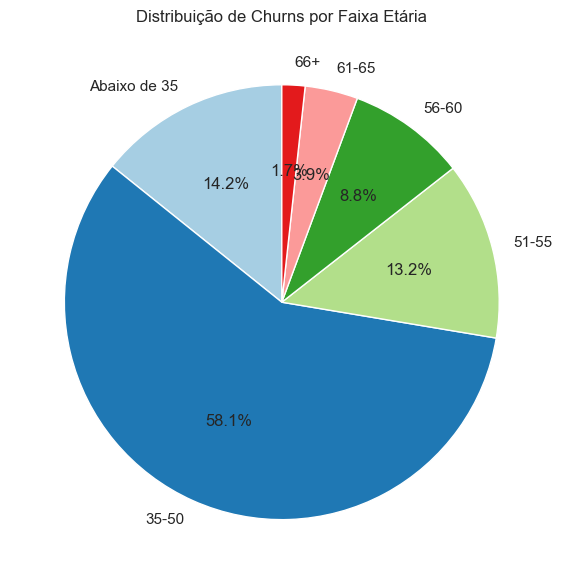

In [297]:
# Plotando Gráfico de Pizza para Distribuição de Churn por Faixa Etária.

# Dados das faixas etárias e suas contagens de churn
faixas_etarias = ['Abaixo de 35','35-50', '51-55', '56-60', '61-65', '66+']
contagem_faixas = [290, 1184, 269, 179, 80, 35]

# Criar gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(contagem_faixas, labels=faixas_etarias, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Adicionar título
plt.title('Distribuição de Churns por Faixa Etária')

# Exibir gráfico
plt.tight_layout()
plt.show()


Insight: **A soma das faixas etárias de 35 a 50 anos corresponde a 58.1% de todos os churns**. Isso destaca essa faixa etária como um grupo chave que deve estar enfrentando mais insatisfação com o serviço ou produtos oferecidos, merecendo uma atenção especial.

### Insights sobre as Faixas Etárias dos Churns no Banco Europeu

- A faixa de 35 a 50 é a mais crítica em termos de churn, sugerindo que as estratégias de retenção precisam ser mais intensivas para esses clientes.

- Embora a taxa de churn seja menor entre os clientes mais jovens, é crucial desenvolver estratégias para mantê-los engajados à medida que envelhecem e se aproximam de faixas etárias com maiores índices de churn.

Agora que os churns foram analisados por faixa etária, é importante investigar também quais faixas etárias apresentam maior retenção de clientes. Esse estudo permitirá identificar quais grupos etários o Banco Europeu deve focar para fortalecer sua base de clientes e, potencialmente, ajustar suas estratégias de retenção para esses segmentos específicos.




In [298]:
# Analisando as faixas etárias com maior incidência de permanência aos serviços do banco.

# Agrupando as idades em faixas etárias.
faixa_etaria = pd.cut(clientes_stay['Idade'], bins=[0, 34, 40, 45, 50, 55, 60, 65, 100], right=True, 
                       labels=['Abaixo de 35', '35-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66+'])

# Contar as ocorrências em cada faixa etária
contagem_faixa_etaria = faixa_etaria.value_counts().sort_index()

contagem_faixa_etaria

Idade
Abaixo de 35    3389
35-40           2344
41-45           1076
46-50            456
51-55            192
56-60            157
61-65            120
66+              229
Name: count, dtype: int64

Insight: Ao analisar as faixas etárias com maior incidência de permanência, **observa-se uma concentração de clientes nas faixas etárias de abaixo de 35 até 40 anos**. Esse dado é relevante, pois destaca um público mais jovem como predominante entre os clientes que permanecem no Banco Europeu.


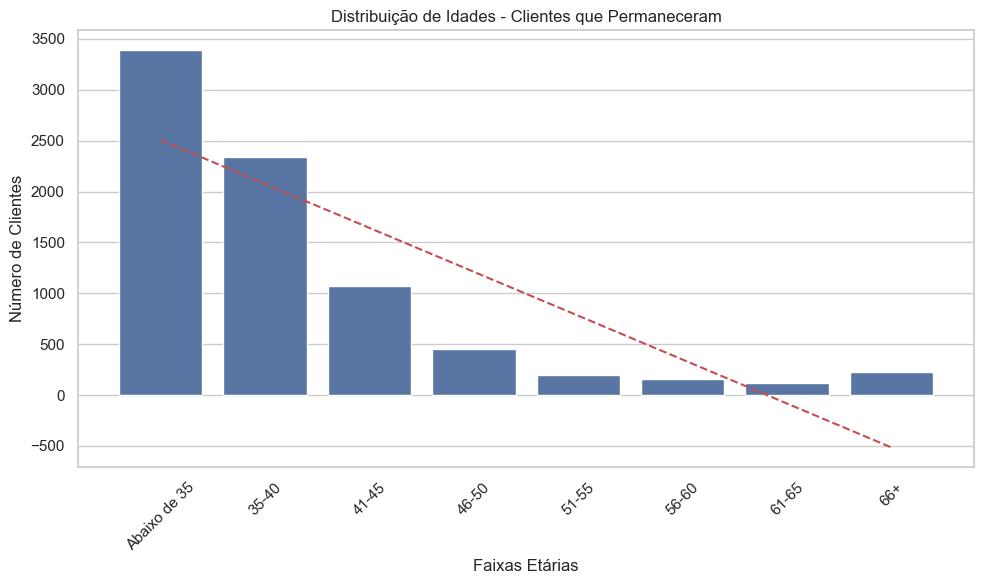

In [299]:
# Gerando Gráfico de Barras para Analisar Distribuição de Clientes Retidos por Faixa Etária.

# Dados das contagens de faixas etárias
faixas_etarias = ['Abaixo de 35', '35-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66+']
contagem_faixa_etaria = [3389, 2344, 1076, 456, 192, 157, 120, 229]

# Criando o gráfico de colunas
plt.figure(figsize=(10, 6))
sns.barplot(x=faixas_etarias, y=contagem_faixa_etaria, color='b')

# Adicionando a linha de tendência
z = np.polyfit(range(len(faixas_etarias)), contagem_faixa_etaria, 1)
p = np.poly1d(z)
plt.plot(range(len(faixas_etarias)), p(range(len(faixas_etarias))), color='r', linestyle='--')

# Personalizar o gráfico
plt.title('Distribuição de Idades - Clientes que Permaneceram')
plt.xlabel('Faixas Etárias')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


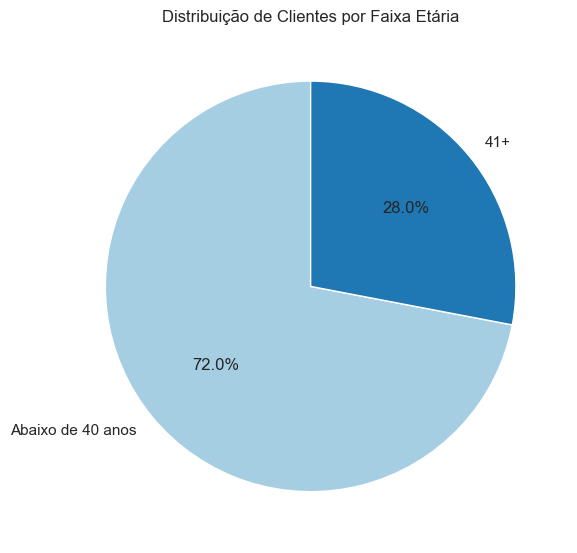

In [300]:
# Gerando gráfico de pizza.

# Dados corrigidos das faixas etárias e suas contagens de churn
faixas_etarias = ['Abaixo de 40 anos', '41+']
contagem_faixa_etaria = [5733, sum([1076, 456, 192, 157, 120, 229])]  # Soma dos valores acima de 41

# Criar gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(contagem_faixa_etaria, labels=faixas_etarias, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Adicionar título
plt.title('Distribuição de Clientes por Faixa Etária')

# Exibir gráfico
plt.tight_layout()
plt.show()



Insight: Gráfico de pizza, que demonstra a distribuição da retenção dos clientes por faixa etária, **reforça visualmente o quanto o banco é popular entre os clientes mais jovens, enquanto há uma saída mais expressiva dos clientes nas faixas etárias mais altas**.

### Insights sobre as Faixas Etárias dos Clientes Retidos
- **Forte Retenção entre Jovens**: A maior parte dos clientes que continuam utilizando os serviços do banco está abaixo de 40 anos. Faixas etárias como "Abaixo de 35" e "35-40" representam uma proporção significativa do total de clientes retidos. Juntos, esses dois grupos compõem 72% dos clientes que permanecem com o banco, o que indica um claro domínio de um público mais jovem.

- **Declínio Gradual na Retenção com o Aumento da Idade**: A retenção de clientes começa a cair consideravelmente a partir dos 41 anos. O grupo de 41 a 45 anos ainda mantém uma presença relevante, mas essa quantidade diminui drasticamente à medida que a idade avança, com apenas 120 clientes na faixa de 61-65 anos e 229 acima de 66 anos. Esse padrão sugere que clientes mais velhos têm uma menor propensão a continuar com o banco.

- O dado de que 72% dos clientes retidos têm menos de 40 anos é um insight valioso para as estratégias de marketing e retenção. O banco pode se concentrar em fortalecer seu apelo aos clientes mais jovens, que parecem ser mais leais aos seus serviços. Campanhas voltadas para esse público podem continuar a ser eficazes para manter altas taxas de retenção.

### Conclusão
- A análise revelou uma **clara concentração de churn entre os clientes na faixa etária de 35 a 50 anos**, indicando que essa faixa merece atenção especial nas estratégias de retenção. Em contraste, a queda gradual nas taxas de churn a partir dos 51 anos sugere que os clientes mais velhos tendem a ser mais fiéis, possivelmente devido a hábitos de uso mais consolidados e a uma menor disposição para mudanças. 

- Além disso, o dado de que **72% dos clientes retidos têm menos de 40 anos destaca a forte retenção entre os jovens**, evidenciando a necessidade de o banco fortalecer seu apelo a esse público. Campanhas direcionadas a clientes mais jovens podem ser eficazes em manter altas taxas de retenção, especialmente se forem alinhadas com suas expectativas e preferências.

- Embora a retenção de clientes diminua com o aumento da idade, **existe uma oportunidade de explorar estratégias voltadas para faixas etárias mais velhas**. Programas de fidelidade ou produtos personalizados para clientes acima de 50 anos podem contribuir para aumentar a retenção desse grupo, que atualmente representa uma parcela menor da base de clientes.

- Portanto, **é fundamental investigar os motivos da insatisfação entre os clientes de 35 a 50 anos**. Realizar pesquisas qualitativas ou grupos focais pode fornecer uma compreensão mais profunda das necessidades e expectativas desse grupo, permitindo que as estratégias de retenção sejam mais eficazes.


### 3 - Análise de Churn ou Retenção com Base no Número de Produtos por Cliente

Nesta seção, vamos analisar como o número de produtos que um cliente possui impacta sua decisão de permanecer ou deixar o banco. Através da análise dos dados, identificaremos a relação entre a quantidade de produtos e a taxa de churn, buscando insights relevantes que possam informar estratégias de retenção. Compreender essa dinâmica é fundamental para desenvolver abordagens que aumentem a fidelização dos clientes.


A partir dessas informações, podemos desenvolver abordagens específicas para melhorar a experiência do cliente e, assim, reduzir a taxa de churn.

Primeiramente, vamos analisar como o número de produtos impacta na saída do cliente dos serviços do banco, identificando os grupos de clientes com maior propensão ao churn e quais níveis de engajamento se mostram mais vulneráveis

In [301]:
# Separando a quantidade de clientes por número de produtos.

contagem_num_produtos = clientes_churn['Numero De Produtos'].value_counts().reset_index()
contagem_num_produtos.columns = ['Numero De Produtos', 'Quantidade de Clientes']

# Exibir a contagem de produtos por cliente

print(contagem_num_produtos)

   Numero De Produtos  Quantidade de Clientes
0                   1                    1409
1                   2                     348
2                   3                     220
3                   4                      60


Insight: A análise da contagem de churns por número de produtos revela uma clara tendência: a maior parte dos clientes que deixam o banco possui apenas 1 produto. Com 1.409 churns, esse grupo representa a maioria dos casos de saída, indicando uma possível falta de engajamento ou satisfação com os serviços oferecidos.

Agora, vamos analisar graficamente essa distribuição para visualizar melhor como o número de produtos influencia a taxa de churn. Isso nos permitirá identificar padrões visuais que confirmem essa tendência e avaliar de forma mais clara a relação entre o número de produtos e a decisão dos clientes de deixar o banco.

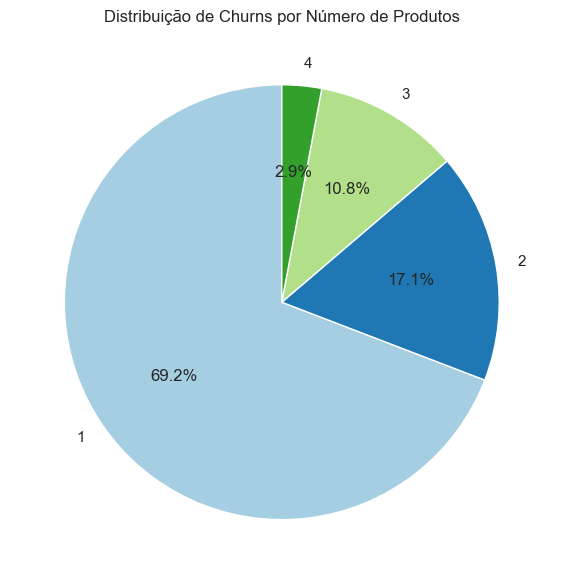

In [302]:
# Gerando gráficos de pizza.

# Dados corrigidos das faixas etárias e suas contagens de churn
num_produtos = ['1', '2', '3', '4']  # Corrigido: separação das strings
contagem_num_produtos = [1409, 348, 220, 60]  

# Criar gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(contagem_num_produtos, labels=num_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Adicionar título
plt.title('Distribuição de Churns por Número de Produtos')

# Exibir gráfico
plt.tight_layout()
plt.show()

Insight: A análise gráfica reforça a tendência observada anteriormente: a grande maioria dos clientes que realizaram churn possui apenas um produto, representando 69,2% do total. Isso sugere que clientes com um relacionamento limitado com o banco, ou seja, com apenas um produto, têm uma maior propensão a deixar a instituição.

Agora, vamos explorar a retenção dos clientes com base no número de produtos adquiridos por cada cliente. Essa análise nos ajudará a entender como a variedade de produtos que os clientes possuem influencia sua permanência no banco.

In [303]:
# Separando a quantidade de clientes por número de produtos.


contagem_num_produtos = clientes_stay['Numero De Produtos'].value_counts().reset_index()
contagem_num_produtos.columns = ['Numero De Produtos', 'Quantidade de Clientes']

# Exibir a contagem de produtos por cliente

print(contagem_num_produtos)

   Numero De Produtos  Quantidade de Clientes
0                   2                    4242
1                   1                    3675
2                   3                      46


Insight: **Nota-se uma retenção significativa de clientes que possuem 1 ou 2 produtos do Banco Europeu**, com 4.242 clientes mantendo 2 produtos e 3.675 clientes mantendo 1 produto. Essa evidência sugere que a simplicidade no portfólio de produtos pode estar contribuindo para a fidelização desses clientes.

C:\Users\victor\AppData\Local\Temp\ipykernel_7564\2292907115.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Numero De Produtos', y='Quantidade de Clientes', data=contagem_num_produtos, palette='Blues_d')


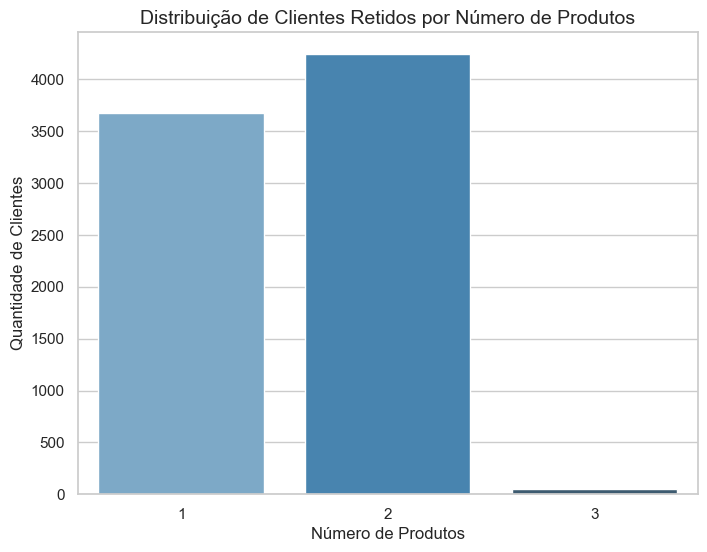

In [304]:
# Gerando gráficos de barra.

# Definir o estilo do gráfico
sns.set(style="whitegrid")

# Criar gráfico de barras para o número de produtos dos clientes retidos
plt.figure(figsize=(8, 6))
sns.barplot(x='Numero De Produtos', y='Quantidade de Clientes', data=contagem_num_produtos, palette='Blues_d')

# Adicionar rótulos e título ao gráfico
plt.title('Distribuição de Clientes Retidos por Número de Produtos', fontsize=14)
plt.xlabel('Número de Produtos', fontsize=12)
plt.ylabel('Quantidade de Clientes', fontsize=12)

# Mostrar o gráfico
plt.show()


Insight: **Nota-se um grande acúmulo de clientes com 1 ou 2 produtos adquiridos**, enquanto poucos clientes possuem mais que 2 produtos. Essa concentração sugere que a simplicidade no portfólio de produtos pode estar contribuindo para a retenção, mas também indica uma oportunidade não explorada para o banco

### Conclusão

- Embora a simplicidade inicial do portfólio pareça eficaz para retenção, a análise revela que clientes com apenas 1 produto apresentam a maior taxa de churn, evidenciando uma fragilidade no engajamento. Portanto, o banco poderia explorar estratégias para aumentar a adoção de múltiplos produtos, diversificando o portfólio e oferecendo soluções mais personalizadas, o que ajudaria a reduzir o churn e aumentar a satisfação dos clientes.

- Por outro lado, a retenção é mais robusta entre clientes que possuem 2 produtos, evidenciando que um portfólio diversificado pode contribuir para a fidelização. Essa constatação ressalta a importância de incentivar esses clientes a explorar ainda mais serviços, potencialmente aumentando a lealdade a longo prazo.

- Observa-se que a retenção de clientes com 3 produtos é extremamente baixa, o que se reflete em um número significativo de churns nesse grupo. Isso pode indicar que o banco enfrenta desafios na oferta de benefícios ou suporte adequados para clientes mais engajados, resultando em insatisfação e eventual saída.


### 4- Atividade do Cliente

Nesta seção, analisaremos a relação entre a atividade do cliente e o churn. A atividade do cliente, geralmente medida pelo uso frequente dos serviços bancários, é um indicador crucial para prever a probabilidade de um cliente permanecer ou sair. Analisando essas variáveis, podemos entender melhor como o engajamento impacta a retenção e quais ações podem ser implementadas para aumentar a atividade e, consequentemente, reduzir o churn.




In [305]:
# Analisando a quantidade de membros ativos no dataframe "clientes_churn".
clientes_churn['Membro Ativo'].value_counts()

Membro Ativo
0    1302
1     735
Name: count, dtype: int64

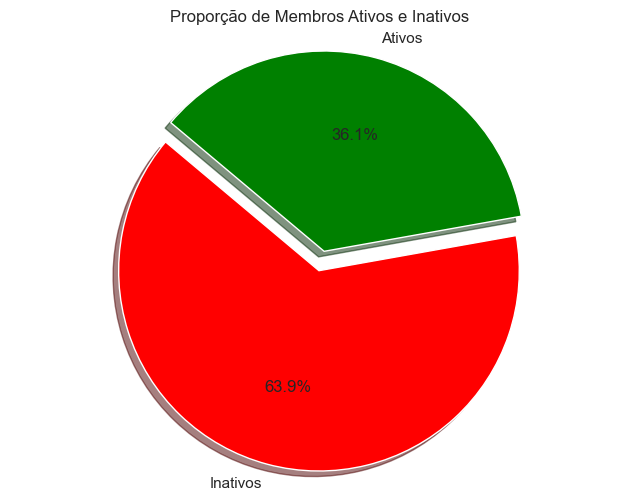

In [306]:
# gerando grafico de pizza sobre os membros ativos no dataframe "clientes_churn".
# Dados
labels = ['Inativos', 'Ativos']
sizes = [1302, 735]
colors = ['red', 'green']
explode = (0.1, 0)  # explode o primeiro pedaço (inativos) para destacar

# Criando o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proporção de Membros Ativos e Inativos')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


Insight: A análise dos dados revela que os **clientes inativos do banco (63.9 %), que não se engajam ativamente, apresentam taxas de churn significativamente mais altas em comparação com os clientes ativos**. No entanto, é alarmante observar que a taxa de churn entre os clientes ativos também é considerável, indicando um potencial problema de retenção que não pode ser ignorado.

Vamos investigar quais idades são menos engajadas para tirar insights valiosos sobre o churn no Banco Europeu.

In [307]:
# Gerando uma tabela que compara o status de atividade dos membros com suas respectivas faixas etárias.

# Agrupando as idades em faixas etárias
faixa_etaria = pd.cut(clientes_churn['Idade'], bins=[0, 34, 40, 45, 50, 55, 60, 65, 100], 
                       right=True, labels=['Abaixo de 35', '35-40', '41-45', '46-50', 
                                           '51-55', '56-60', '61-65', '66+'])

# Contar as ocorrências em cada faixa etária para membros ativos e inativos
contagem_faixa_etaria = clientes_churn.groupby(['Membro Ativo', faixa_etaria]).size().unstack(fill_value=0)

# Renomeando as colunas para maior clareza, incluindo todas as faixas etárias
contagem_faixa_etaria.columns = ['Abaixo de 35', '35-40', '41-45', '46-50', 
                                  '51-55', '56-60', '61-65', '66+']

# Exibindo a tabela formatada
contagem_faixa_etaria

C:\Users\victor\AppData\Local\Temp\ipykernel_7564\4135627289.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem_faixa_etaria = clientes_churn.groupby(['Membro Ativo', faixa_etaria]).size().unstack(fill_value=0)


,Abaixo de 35,35-40,41-45,46-50,51-55,56-60,61-65,66+
Membro Ativo,,,,,,,,
0,181,250,260,250,173,115,53,20
1,109,146,134,144,96,64,27,15


In [308]:
# Gerando uma tabela que apresenta as porcentagens de membros ativos e inativos em cada faixa etária.

# Dados fornecidos
dados = {
    'Faixa Etária': ['Abaixo de 35', '35-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66+'],
    'Inativos': [181, 250, 260, 250, 173, 115, 53, 20],
    'Ativos': [109, 146, 134, 144, 96, 64, 27, 15]
}

# Criando um DataFrame
df = pd.DataFrame(dados)

# Calculando totais e porcentagens
df['Total'] = df['Inativos'] + df['Ativos']
df['% Inativos'] = (df['Inativos'] / df['Total']) * 100
df['% Ativos'] = (df['Ativos'] / df['Total']) * 100

# Exibindo as porcentagens
print(df[['Faixa Etária', '% Inativos', '% Ativos']])


   Faixa Etária  % Inativos   % Ativos
0  Abaixo de 35   62.413793  37.586207
1         35-40   63.131313  36.868687
2         41-45   65.989848  34.010152
3         46-50   63.451777  36.548223
4         51-55   64.312268  35.687732
5         56-60   64.245810  35.754190
6         61-65   66.250000  33.750000
7           66+   57.142857  42.857143



Insight: À medida que a faixa etária avança, a porcentagem de clientes inativos tende a aumentar, alcançando 66% na faixa de 61-65 anos. Isso sugere que, conforme os clientes envelhecem, a inatividade se torna um problema mais significativo, possivelmente indicando uma perda de interesse ou necessidade em relação aos serviços oferecidos. No entanto, a faixa etária "66+" apresenta uma porcentagem de inativos mais baixa (57%), com um número considerável de clientes ativos (42,86%). Esse dado pode indicar que, apesar de serem mais velhos, esses clientes estão mais engajados, possivelmente devido a necessidades específicas ou ofertas que atendem melhor a essa faixa etária.


Vamos aprofundar nossa análise utilizando gráficos, proporcionando uma representação visual que facilitará a interpretação e compreensão dessas informações de maneira mais detalhada.

C:\Users\victor\AppData\Local\Temp\ipykernel_7564\1466568993.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem_faixa_etaria = clientes_churn.groupby(['Faixa Etária', 'Membro Ativo']).size().unstack(fill_value=0)


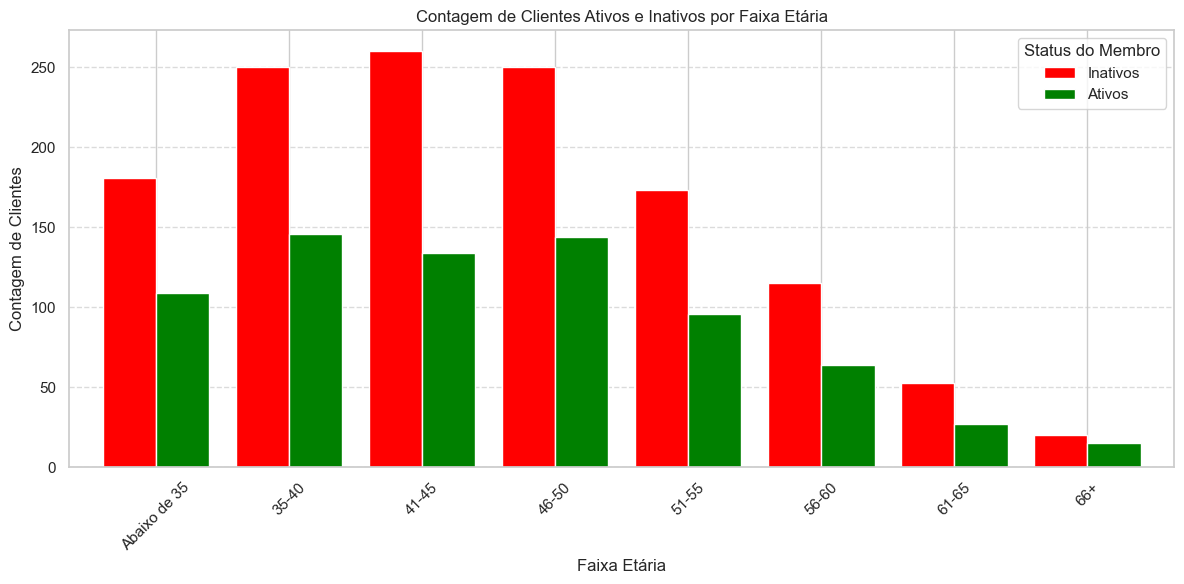

In [309]:
# Criando um gráfico de barras comparativo entre membros ativos e inativos.

# Criando a coluna de faixa etária
faixa_etaria = pd.cut(clientes_churn['Idade'], bins=[0, 34, 40, 45, 50, 55, 60, 65, 100], right=True, 
                       labels=['Abaixo de 35', '35-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66+'])
clientes_churn['Faixa Etária'] = faixa_etaria

# Agrupando por faixa etária e status do membro
contagem_faixa_etaria = clientes_churn.groupby(['Faixa Etária', 'Membro Ativo']).size().unstack(fill_value=0)

# Criando o gráfico de barras
contagem_faixa_etaria.plot(kind='bar', figsize=(12, 6), color=['red', 'green'], width=0.8)

# Adicionando título e rótulos
plt.title('Contagem de Clientes Ativos e Inativos por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem de Clientes')
plt.xticks(rotation=45)
plt.legend(title='Status do Membro', labels=['Inativos', 'Ativos'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


Insight: O gráfico acima reforça nossas investigações anteriores sobre a variável das faixas etárias. Observamos que os índices de inatividade e, consequentemente, a taxa de churn estão significativamente concentrados na faixa etária de 35 a 50 anos. Isso indica que essa faixa etária representa um ponto crítico para o banco, sugerindo a necessidade de estratégias específicas de retenção e engajamento direcionadas a esses clientes. A identificação dessas faixas etárias pode ser um passo importante para entender melhor o comportamento dos clientes e desenvolver iniciativas que promovam a lealdade.

Por isso, é importante também analisar os casos de retenção de clientes com base na atividade do cliente.

In [310]:
# Separando se o membro é ativo de acordo com o dataframe "clientes_stay".

clientes_stay['Membro Ativo'].value_counts()

Membro Ativo
1    4416
0    3547
Name: count, dtype: int64

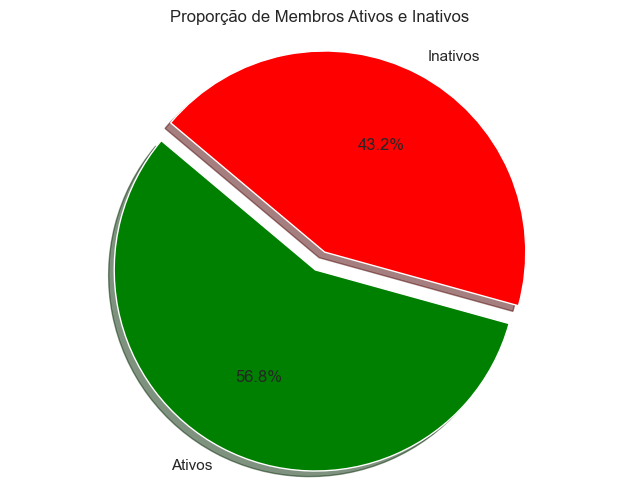

In [311]:
# Criando um grafico de pizza que mostra as porcentagens dos clientes ativos e inativos.

# Dados fornecidos
dados_membro_stay = {'Status': ['Ativo', 'Inativo'], 'Quantidade': [4416, 3547]}

# Dados
labels = ['Ativos', 'Inativos']
sizes = [4416, 3357]
colors = ['green', 'red']
explode = (0.1, 0)  # explode o primeiro pedaço (inativos) para destacar

# Criando o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proporção de Membros Ativos e Inativos')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Insight: Nota-se que há mais clientes ativos do que inativos entre os clientes retidos. No entanto, ainda há uma proporção significativa de clientes inativos, representando cerca de 43,2 % do total. Esse é um ponto preocupante, pois, conforme evidenciado em análises anteriores, clientes inativos têm uma probabilidade consideravelmente maior de churn. Manter um número elevado de clientes inativos na base de retenção pode indicar uma falta de engajamento com os serviços oferecidos pelo banco, o que representa um risco potencial para a taxa de churn.

In [312]:
# Agrupando as idades em faixas etárias
faixa_etaria = pd.cut(clientes_stay['Idade'], bins=[0, 40, 45, 50, 55, 60, 65, 100], 
                       right=True, labels=['Abaixo de 40','41-45', '46-50', 
                                           '51-55', '56-60', '61-65', '66+'])

# Contar as ocorrências em cada faixa etária para membros ativos e inativos
contagem_faixa_etaria = clientes_stay.groupby(['Membro Ativo', faixa_etaria]).size().unstack(fill_value=0)

# Renomeando as colunas para maior clareza, incluindo todas as faixas etárias
contagem_faixa_etaria.columns = ['Abaixo de 40','41-45', '46-50', 
                                  '51-55', '56-60', '61-65', '66+']

# Exibindo a tabela formatada
contagem_faixa_etaria

C:\Users\victor\AppData\Local\Temp\ipykernel_7564\3187453333.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem_faixa_etaria = clientes_stay.groupby(['Membro Ativo', faixa_etaria]).size().unstack(fill_value=0)


,Abaixo de 40,41-45,46-50,51-55,56-60,61-65,66+
Membro Ativo,,,,,,,
0,2767,515,201,41,7,4,12
1,2966,561,255,151,150,116,217


Insight: É evidente que há uma intensa concentração de membros retidos do banco europeu na faixa etária abaixo dos 40 anos, tanto para clientes ativos quanto inativos. Essa observação corrobora a análise anterior, que indicou um padrão semelhante. Entretanto, é importante destacar que, mesmo nessa faixa etária mais jovem, há uma expressiva quantidade de membros inativos. Esse dado é preocupante, pois, apesar da juventude dos clientes sugerir maior potencial de engajamento e uso dos serviços, a inatividade pode indicar que esses membros não estão aproveitando plenamente os produtos do banco ou não encontram valor nos serviços oferecidos.

Agora vamos fazer uma análise grafica para ficar mais claro .

C:\Users\victor\AppData\Local\Temp\ipykernel_7564\426226761.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem_faixa_etaria = clientes_stay.groupby(['Faixa Etária', 'Membro Ativo']).size().unstack(fill_value=0)


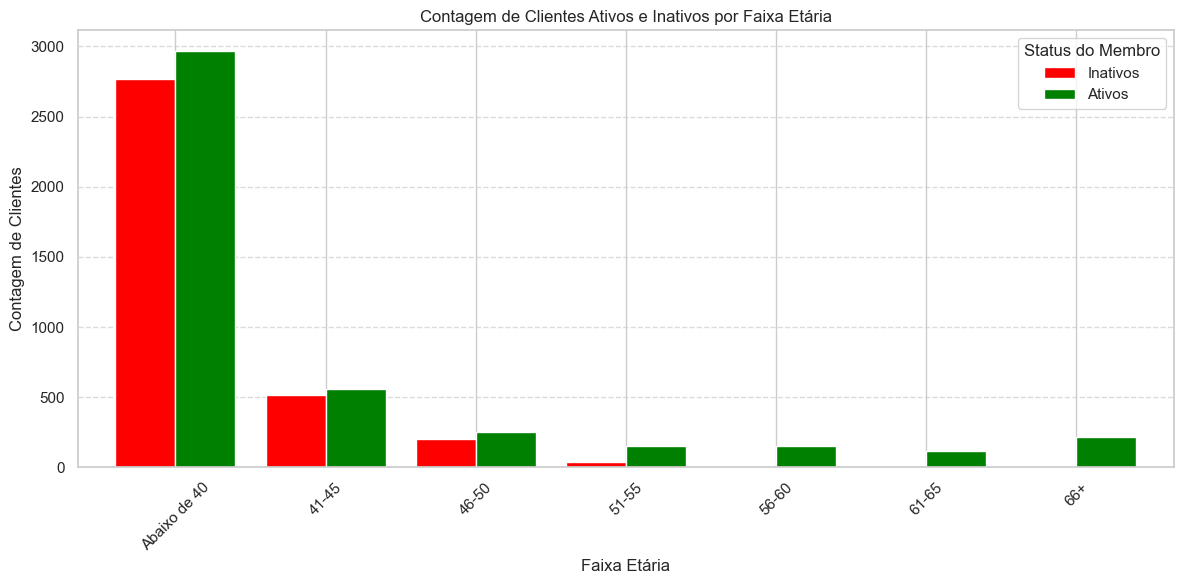

In [313]:
# Gerando um gráfico de barras que mostra a distribuição de clientes ativos e inativos entre os clientes retidos.

# Criando a coluna de faixa etária
faixa_etaria = pd.cut(clientes_stay['Idade'], bins=[0, 40, 45, 50, 55, 60, 65, 100], right=True, 
                       labels=['Abaixo de 40','41-45', '46-50', '51-55', '56-60', '61-65', '66+'])
clientes_stay['Faixa Etária'] = faixa_etaria

# Agrupando por faixa etária e status do membro
contagem_faixa_etaria = clientes_stay.groupby(['Faixa Etária', 'Membro Ativo']).size().unstack(fill_value=0)

# Criando o gráfico de barras
contagem_faixa_etaria.plot(kind='bar', figsize=(12, 6), color=['red', 'green'], width=0.8)

# Adicionando título e rótulos
plt.title('Contagem de Clientes Ativos e Inativos por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem de Clientes')
plt.xticks(rotation=45)
plt.legend(title='Status do Membro', labels=['Inativos', 'Ativos'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

Insight: Analisando o gráfico fornecido, **podemos observar que a faixa etária abaixo dos 40 anos concentra a maior parte dos clientes, tanto ativos quanto inativos**. No entanto, chama atenção a alta proporção de clientes inativos (em vermelho) nesta faixa etária, indicando uma desconexão potencial entre o banco e os clientes mais jovens.

In [314]:
# Gerando uma tabela que apresenta as porcentagens de membros ativos e inativos em cada faixa etária (Dataframe "clientes_stay").

# Dados fornecidos
dados = {
    'Faixa Etária': ['Abaixo de 40', '41-45', '46-50', '51-55', '56-60', '61-65', '66+'],
    'Inativos': [2767, 515, 201, 41, 7, 4, 12],
    'Ativos': [2966, 561, 255, 151, 150, 116, 217]
}

# Criando um DataFrame
df = pd.DataFrame(dados)

# Calculando porcentagens
df['Total'] = df['Inativos'] + df['Ativos']
df['% Inativos'] = (df['Inativos'] / df['Total']) * 100
df['% Ativos'] = (df['Ativos'] / df['Total']) * 100

# Exibindo as porcentagens
print(df[['Faixa Etária', '% Inativos', '% Ativos']])




   Faixa Etária  % Inativos   % Ativos
0  Abaixo de 40   48.264434  51.735566
1         41-45   47.862454  52.137546
2         46-50   44.078947  55.921053
3         51-55   21.354167  78.645833
4         56-60    4.458599  95.541401
5         61-65    3.333333  96.666667
6           66+    5.240175  94.759825


Insight: Clientes retidos apresentem uma predominância de membros ativos, a significativa porcentagem de inatividade nas faixas etárias mais jovens e intermediárias requer atenção urgente e estratégias de retenção mais eficazes para garantir a sustentabilidade e o crescimento da base de clientes.

### Conclusão

A análise dos clientes retidos e aqueles que deram churn fornece insights valiosos sobre o comportamento dos clientes e as dinâmicas de engajamento do banco. As principais observações são:

- **Clientes Retidos**: A maioria dos clientes retidos apresenta um status ativo, mas ainda assim, uma proporção significativa, cerca de 43,2%, é composta por clientes inativos. Essa inatividade entre os clientes retidos é preocupante, pois clientes inativos têm maior probabilidade de churn. O fato de manter um número elevado de inativos dentro da base de clientes retidos pode indicar uma falta de engajamento com os serviços, representando um risco considerável para a sustentabilidade do banco.

- **Churn entre Clientes Ativos**: A análise mostra que, apesar de os clientes ativos terem um envolvimento aparente, a taxa de churn entre eles é alarmante. Isso sugere que mesmo os clientes que utilizam os serviços do banco podem não estar completamente satisfeitos ou encontrar valor em suas ofertas. A migração para concorrentes, em busca de serviços mais alinhados às suas expectativas, pode ser um fator importante.

- **Faixas Etárias e Churn**: A segmentação etária revela que a inatividade tende a aumentar à medida que os clientes envelhecem, com 66% de inatividade entre aqueles de 61 a 65 anos. No entanto, é interessante notar que, na faixa "66+", a taxa de inatividade diminui para 57%, indicando que clientes mais velhos podem estar mais engajados, possivelmente devido a ofertas que atendem melhor às suas necessidades.

- **Desconexão com Clientes Jovens**: Uma análise adicional aponta que a faixa etária abaixo de 40 anos, apesar de ter uma significativa concentração de clientes retidos, também apresenta uma alarmante proporção de inatividade. Isso sugere uma desconexão potencial entre o banco e os clientes mais jovens, indicando que, mesmo com o potencial de engajamento, esses clientes podem não estar vendo valor suficiente nos serviços oferecidos.



### 5 - Impacto da Demografia

Vamos aprofundar nossa análise na demografia dos clientes, buscando entender melhor como características como localização geográfica e gênero influenciam o churn no Banco Europeu. Para isso, iremos investigar padrões específicos que possam nos ajudar a compreender quais perfis de clientes têm maior probabilidade de deixar o banco.

A análise irá considerar variáveis como a região em que residem e a distribuição entre os gêneros. Ao examinar esses dados de forma mais detalhada, esperamos identificar tendências que possam explicar a relação entre demografia e churn, oferecendo insights valiosos para a formulação de estratégias de retenção.


In [315]:
# Verificando os churns de cada país.
porcentagem = base_atualizada.groupby('Pais')['Saiu'].agg(['count', 'sum'])
porcentagem['Porcentagem de Saída'] = round((porcentagem['sum'] / porcentagem['count']) * 100, 3)
porcentagem

,count,sum,Porcentagem de Saída
Pais,,,
France,5014,810,16.155
Germany,2509,814,32.443
Spain,2477,413,16.673


Insight: É notório uma concentração de clientes da França, que representa uma parcela significativamente maior da base total do banco quando comparado com os outros países europeus, como Alemanha e Espanha. Esse desequilíbrio sugere que a atuação do banco é mais forte e consolidada no mercado francês.

A seguir, vamos gerar visualizações gráficas que ajudem a compreender melhor esses padrões, facilitando a tomada de decisões estratégicas baseadas nesses dados.

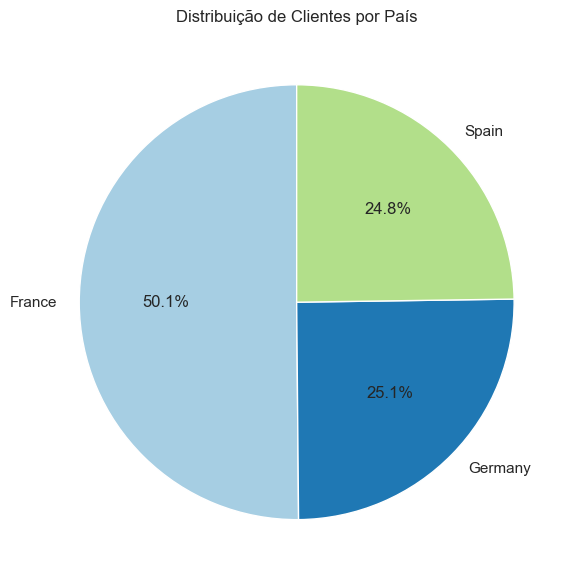

In [316]:
# gerando um gráfico de pizza que compara os clientes de cada país.
 
# Definir os países e as quantidades de clientes.
paises = porcentagem.index
quantidade_clientes = porcentagem['count']

# Criar gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(quantidade_clientes, labels=paises, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Adicionar título
plt.title('Distribuição de Clientes por País')

# Exibir gráfico
plt.tight_layout()
plt.show()


Insight: Ao analisar a distribuição dos clientes do Banco Europeu, percebe-se que a França representa a maior parte da base de clientes, com 50,1% do total. Esse é um dado relevante, pois mostra uma predominância clara de clientes franceses no banco.

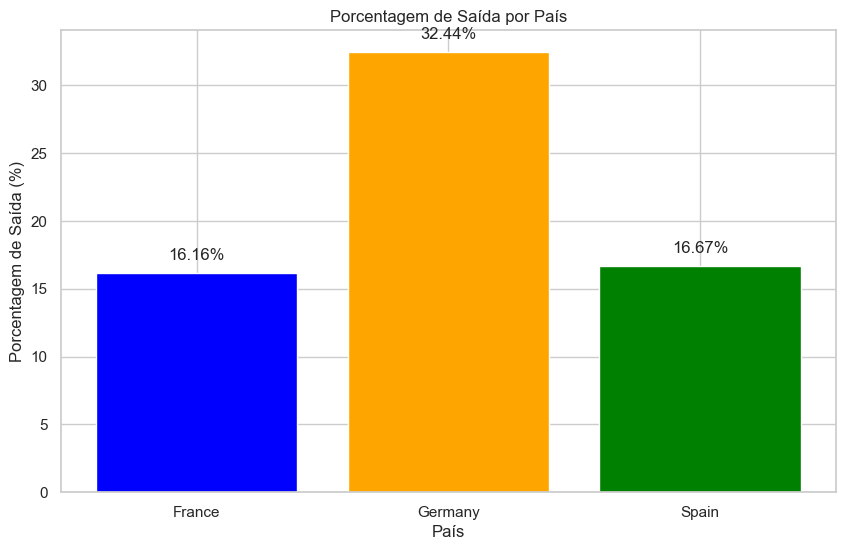

In [317]:
# Plotando o gráfico das porcentagens de churn por país.

# Configurar o gráfico
plt.figure(figsize=(10, 6))
plt.bar(porcentagem.index, porcentagem['Porcentagem de Saída'], color=['blue', 'orange', 'green'])

# Adicionar título e rótulos
plt.title('Porcentagem de Saída por País')
plt.xlabel('País')
plt.ylabel('Porcentagem de Saída (%)')

# Adicionar rótulos nas barras
for i in range(len(porcentagem)):
    plt.text(i, porcentagem['Porcentagem de Saída'].iloc[i] + 1, f"{porcentagem['Porcentagem de Saída'].iloc[i]:.2f}%", ha='center')

# Exibir o gráfico
plt.show()


### Insights sobre Churn com Base dos Países no Banco Europeu

- Observa-se que a Alemanha se destaca como o país com a maior porcentagem de churn, refletindo um cenário preocupante para a instituição financeira. Este país apresenta quase o dobro de churns em comparação com os demais países onde o banco opera, o que sugere uma questão mais profunda em relação à satisfação e ao engajamento dos clientes nesse mercado específico. 

- Diante dessa realidade, torna-se essencial implementar uma estratégia robusta de retenção de clientes, com foco particular na Alemanha. Ações direcionadas podem incluir programas de fidelização mais atrativos, melhorias nos serviços oferecidos e um acompanhamento mais próximo das necessidades e feedbacks dos clientes. O objetivo primordial deve ser reduzir a quantidade de churns nesse país, promovendo um ambiente mais favorável e satisfatório para a base de clientes alemã, que, se bem cuidada, pode se transformar em um ativo valioso para o banco no longo prazo.

- Com o mercado francês já bem estabelecido, o foco na Alemanha pode equilibrar a carteira de clientes do banco, proporcionando crescimento sustentável. Além disso, explorar as oportunidades de expansão na Espanha, com uma base de clientes próxima à da Alemanha, o mercado espanhol apresenta um potencial de crescimento mais estável, desde que sejam evitados os problemas de retenção observados no mercado alemão.

Como já realizamos a exploração de uma das variáveis categóricas, é fundamental agora analisar a variável categórica 'Gênero' para entender melhor seu impacto nas taxas de churn.

In [318]:
# Comparando a coluna 'Gênero' com a quantidade de churns e apresentando a porcentagem de clientes em relação ao total de churns
porcentagem1 = base_atualizada.groupby('Genero')['Saiu'].agg(['count', 'sum'])
porcentagem1['Porcentagem de Saída'] = round((porcentagem1['sum'] / porcentagem1['count']) * 100, 3)
porcentagem1

,count,sum,Porcentagem de Saída
Genero,,,
Female,4543,1139,25.072
Male,5457,898,16.456


***Comparação Geral de Churns por Gênero***

Feminino: 4.543 clientes, com uma quantidade de 1.139 churns.

Masculino: 5.457 clientes, com uma quantidade de 898 churns.

A porcentagem de saída entre as clientes femininas foi de 25.07%, enquanto que entre os clientes masculinos foi de 16.46%.

Insight: Esses dados revelam uma porcentagem 52,3% maior de churns femininos em comparação com os masculinos, indicando que as mulheres estão mais propensas a deixar o banco.

In [319]:
# Verificando os churns por País e por Gênero.

# Agrupar contagens de churn por país e gênero
contagens_churn = clientes_churn.groupby(['Pais', 'Genero']).size().reset_index(name='Contagem')

# Calcular o total de churns por país
total_por_pais = clientes_churn.groupby('Pais').size().reset_index(name='Total_Churns')

# Realizar o merge
resultado = pd.merge(contagens_churn, total_por_pais, on='Pais')

# Calcular a porcentagem
resultado['Porcentagem'] = round((resultado['Contagem'] / resultado['Total_Churns']) * 100, 3)

# Drop de coluna desnecessário
resultado.drop(columns = 'Total_Churns', inplace = True)

# Exibir o resultado
resultado


,Pais,Genero,Contagem,Porcentagem
0,France,Female,460,56.790
1,France,Male,350,43.210
2,Germany,Female,448,55.037
3,Germany,Male,366,44.963
4,Spain,Female,231,55.932
5,Spain,Male,182,44.068


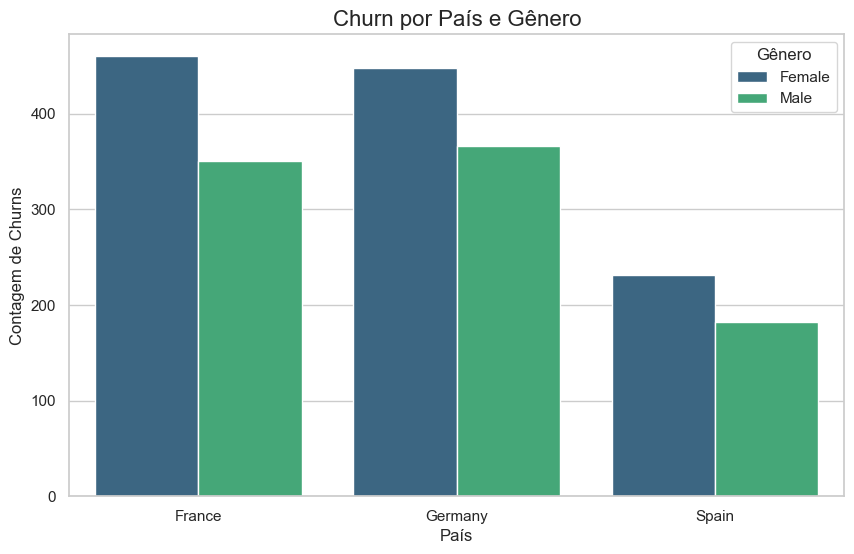

In [320]:
# Gerando gráficos de barras comparativos que ilustram a relação entre gênero e a quantidade de churns.

# Definir o estilo do gráfico
sns.set(style="whitegrid")

# Criar um gráfico de barras para a contagem de churn por país e gênero
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Pais', y='Contagem', hue='Genero', data=resultado, palette='viridis')

# Adicionar rótulos e título ao gráfico
plt.title('Churn por País e Gênero', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Contagem de Churns', fontsize=12)
plt.legend(title='Gênero')

# Exibir o gráfico
plt.show()


### Insights sobre Churn no Banco Europeu

- Após a análise dos dados de churn no Banco Europeu, diversas informações relevantes foram descobertas, destacando diferenças significativas entre os gêneros e suas respectivas taxas de saída.

- Os dados também foram segmentados por país, permitindo uma análise mais granular das taxas de churn.

- As informações acima mostram que, em todos os países analisados (França, Alemanha e Espanha), as mulheres apresentam uma porcentagem de churn superior à dos homens. Em particular, as taxas de churn feminino são consistentemente mais altas, indicando uma possível necessidade de revisar as estratégias de retenção para este segmento.


## Relatório Final
Com base em uma análise detalhada dos dados de churn do Banco Europeu, estamos prontos para apresentar um relatório final que fornecerá insights valiosos para orientar as decisões estratégicas do banco. Este relatório destaca os principais pontos relacionados às variáveis **Idade, Número de Produtos, Membro Ativo (Atividade do Cliente)** e o Impacto da Demografia, considerando as variáveis categóricas **País e Gênero**. Nosso objetivo é reduzir os índices de churn e aumentar a receita do Banco Europeu, focando em estratégias que mantenham e aprimorem os pontos fortes existentes.

Ao implementar essas estratégias, esperamos não apenas reduzir os índices de churn, mas também promover um aumento significativo na receita do Banco Europeu, solidificando sua posição competitiva e eficaz no mercado.

## Faixa Etária

#### Insight: Concentração de Churn entre Clientes de 35 a 50 Anos
**Proposta Recomendada**: Implementar estratégias de retenção focadas em clientes na faixa etária de 35 a 50 anos.

**Ação**: Realizar uma investigação aprofundada sobre os motivos da insatisfação entre os clientes de 35 a 50 anos, utilizando pesquisas qualitativas, grupos focais e análises de feedback. Essa pesquisa deve identificar fatores específicos que contribuem para a decisão de churn, como serviços, produtos ou experiências insatisfatórias.

**Estratégia**: Desenvolver campanhas direcionadas que abordem as preocupações identificadas, promovendo serviços personalizados e benefícios que atendam às expectativas desse grupo etário. Também é crucial monitorar continuamente a satisfação dos clientes após a implementação dessas mudanças.


#### Insight: Forte Retenção entre Clientes Abaixo de 40 Anos
**Proposta Recomendada**: Aumentar o foco nas campanhas de marketing direcionadas a clientes jovens.

**Ação**: Criar campanhas de marketing específicas que ressoem com as necessidades e preferências dos clientes abaixo de 40 anos. Isso pode incluir promoções, eventos e conteúdos educacionais que abordem as finanças pessoais, além de opções de produtos que atendam a esse público.

**Estratégia**: Utilizar dados demográficos e comportamentais para personalizar as ofertas e comunicações, garantindo que sejam relevantes e atraentes para essa faixa etária. Engajar influenciadores digitais ou plataformas que são populares entre os jovens pode aumentar ainda mais o impacto dessas campanhas.


#### Insight: Declínio Gradual na Retenção com o Aumento da Idade
**Proposta Recomendada**: Desenvolver produtos e programas específicos para clientes acima de 50 anos.

**Ação**: Criar uma análise de mercado para identificar as preferências e necessidades dos clientes mais velhos. Desenvolver programas de fidelidade e produtos personalizados que ofereçam vantagens claras e atendam às expectativas desse grupo.

**Estratégia**: Implementar um marketing segmentado que destaque os benefícios desses produtos e programas, enfatizando a segurança e a confiabilidade, que são muitas vezes prioritárias para essa faixa etária. A formação de parcerias com organizações que atendem esse público pode ser uma maneira eficaz de aumentar a visibilidade e a aceitação.

#### Insight: Necessidade de Entender as Expectativas dos Clientes de 35 a 50 Anos
**Proposta Recomendada**: Conduzir uma pesquisa qualitativa para obter insights sobre as expectativas desse grupo.

**Ação**: Realizar grupos focais ou entrevistas individuais com clientes de 35 a 50 anos para discutir suas experiências, expectativas e motivos para considerar a saída do banco. Essa pesquisa deve ser feita de forma a garantir um ambiente seguro e aberto para o compartilhamento de opiniões.

**Estratégia**: Utilizar os insights obtidos para refinar as ofertas de produtos e serviços, além de desenvolver uma comunicação mais eficaz que mostre o compromisso do banco em atender às necessidades desse grupo. A implementação de um ciclo de feedback contínuo será crucial para a melhoria contínua.


## Produtos por Clientes

### Insight: Alta Taxa de Churn entre Clientes com Apenas 1 Produto
**Proposta Recomendada**: Implementar estratégias para aumentar a adoção de múltiplos produtos entre os clientes.

**Ação**: Realizar campanhas de marketing e engajamento voltadas para clientes que possuem apenas 1 produto, incentivando a exploração de outros serviços e produtos oferecidos pelo banco. Essas campanhas devem destacar os benefícios e soluções personalizadas que a diversificação pode proporcionar.

**Estratégia**: Utilizar dados de comportamento e feedback dos clientes para adaptar as ofertas e comunicações, apresentando produtos que se alinhem com as necessidades dos clientes. O objetivo é criar uma jornada do cliente que valorize a inclusão de múltiplos produtos, aumentando a percepção de valor e engajamento.

### Insight: Retenção Significativa de Clientes com 2 Produtos
**Proposta Recomendada**: Fomentar a diversificação dos produtos entre os clientes que já possuem 2 produtos.

**Ação**: Desenvolver programas de fidelidade ou incentivos que recompensem clientes com 2 produtos por explorar ainda mais os serviços disponíveis. Oferecer benefícios adicionais ou promoções exclusivas para esses clientes pode incentivá-los a adicionar mais produtos ao seu portfólio.

**Estratégia**: Criar um plano de comunicação que reforce os benefícios de ter múltiplos produtos, utilizando estudos de caso ou depoimentos de clientes satisfeitos que aproveitaram mais serviços. A implementação de um ciclo de feedback contínuo ajudará a ajustar as ofertas com base nas respostas dos clientes.

### Insight: Fragilidade na Retenção de Clientes com 3 ou Mais Produtos
**Proposta Recomendada**: Investigar e aprimorar a experiência dos clientes com 3 produtos ou mais.

**Ação**: Realizar entrevistas e pesquisas de satisfação específicas para entender as expectativas e necessidades dos clientes com 3 produtos, que demonstraram alta taxa de churn. Identificar os principais pontos de insatisfação e os benefícios que estão faltando.

**Estratégia**: Utilizar os insights obtidos para desenvolver um suporte mais robusto e soluções personalizadas que atendam a esse grupo. Implementar melhorias nos serviços oferecidos, como consultoria financeira personalizada, ofertas exclusivas ou atendimento prioritário, para fortalecer o relacionamento e reduzir a taxa de churn.

### Insight: Oportunidade de Diversificação no Portfólio de Produtos
**Proposta Recomendada**: Explorar a ampliação do portfólio de produtos oferecidos.

**Ação**: Conduzir uma análise de mercado para identificar novas oportunidades de produtos ou serviços que possam ser introduzidos no portfólio. Considerar feedbacks de clientes e tendências de mercado ao desenvolver novos produtos.

**Estratégia**: Implementar um programa de testes e feedback com clientes que possuem 1 ou 2 produtos, buscando compreender quais novos serviços seriam mais atraentes. A diversificação do portfólio pode não apenas atrair novos clientes, mas também aumentar a retenção, incentivando a adoção de múltiplos produtos.

## Membro Ativo (Atividade do Cliente)

### Insight: Alta Taxa de Churn entre Clientes Inativos
**Proposta Recomendada**: Implementar ações para aumentar o engajamento dos clientes inativos.

**Ação**: Criar campanhas de reengajamento direcionadas a clientes inativos, oferecendo incentivos, como promoções ou serviços gratuitos, para incentivá-los a voltar a utilizar os produtos e serviços do banco.

**Estratégia**: Utilizar uma comunicação personalizada, baseada nas interações anteriores do cliente, destacando ofertas que possam despertar seu interesse. Monitorar a resposta a essas campanhas e ajustar as estratégias conforme necessário, visando transformar clientes inativos em clientes ativos novamente.

### Insight: Aumento da Inatividade com a Idade
**Proposta Recomendada**: Desenvolver produtos e serviços adaptados às necessidades das faixas etárias mais avançadas.

**Ação**: Realizar pesquisas e grupos focais com clientes na faixa etária de 61-65 anos e 66+ para entender suas necessidades e preferências. Basear o desenvolvimento de produtos e serviços nessas informações, buscando criar ofertas que realmente atendam a essas faixas etárias.

**Estratégia**: Personalizar a comunicação e os serviços, abordando especificamente como os produtos podem resolver as necessidades ou preocupações dessa faixa etária. Isso pode incluir serviços financeiros mais simples ou consultoria que ajude na gestão de aposentadorias e finanças.

### Insight: Faixa Etária de 35 a 50 Anos como Ponto Crítico
**Proposta Recomendada**: Criar estratégias de retenção focadas na faixa etária de 35 a 50 anos.

**Ação**: Desenvolver campanhas de marketing e engajamento que abordem as necessidades específicas dos clientes nessa faixa etária, destacando produtos que possam ser relevantes, como investimentos ou empréstimos.

**Estratégia**: Estabelecer um programa de fidelidade que ofereça benefícios adicionais para clientes ativos nessa faixa etária, reforçando a importância de seu engajamento com o banco. Realizar análises contínuas para monitorar a eficácia dessas iniciativas.

### Insight: Desconexão entre o Banco e Clientes Abaixo de 40 Anos
**Proposta Recomendada**: Estabelecer conexões mais fortes com clientes abaixo de 40 anos.

**Ação**: Criar experiências personalizadas e relevantes para essa faixa etária, utilizando plataformas digitais e redes sociais para se comunicar de forma mais eficaz. Implementar um aplicativo que ofereça funcionalidades que atendam suas necessidades financeiras, como gestão de despesas e investimento.

**Estratégia**: Envolver esses clientes através de eventos ou webinars que abordem tópicos de interesse, como investimentos ou educação financeira, criando um senso de comunidade e pertencimento ao banco.

### Insight: Preocupação com a Sustentabilidade da Base de Clientes
**Proposta Recomendada**: Monitorar continuamente a atividade dos clientes e ajustar as abordagens conforme necessário.

**Ação**: Implementar um sistema de monitoramento que identifique clientes com padrões de inatividade, permitindo intervenções proativas. Além disso, utilizar análises preditivas para prever churn e implementar ações preventivas.

**Estratégia**: Realizar análises regulares sobre a atividade dos clientes e ajustar as campanhas de engajamento conforme as tendências observadas. Um acompanhamento mais próximo permitirá que o banco reaja rapidamente a mudanças no comportamento dos clientes, garantindo a sustentabilidade da base de clientes.

## Impacto da Demografia (País e Gênero).

### Insight: Alta Concentração de Clientes na França
**Proposta Recomendada**: Diversificar a base de clientes, com foco na expansão em outros mercados europeus.

**Ação**: Desenvolver campanhas de marketing específicas para os clientes em países com menor participação, como Alemanha e Espanha, visando aumentar a conscientização sobre os produtos e serviços do banco.

**Estratégia**: Utilizar dados demográficos e comportamentais para segmentar os clientes e criar ofertas personalizadas que atendam às necessidades locais. Além disso, acompanhar a eficácia dessas campanhas por meio de métricas de engajamento e churn.


**Insight**: Elevada Taxa de Churn na Alemanha
**Proposta Recomendada**: Implementar uma estratégia focada na retenção de clientes na Alemanha.

**Ação**: Criar um programa de fidelização que aborde as preocupações dos clientes alemães, com benefícios atrativos e suporte ao cliente melhorado.

**Estratégia**: Realizar pesquisas de satisfação e feedback com os clientes na Alemanha para entender suas necessidades e desafios. Com base nos insights obtidos, ajustar os serviços e ofertas para melhorar a experiência do cliente e reduzir a taxa de churn.

### Insight: Taxas de Churn Femininas Superior às Masculinas
**Proposta Recomendada**: Reavaliar e otimizar as estratégias de retenção para clientes femininas.

**Ação**: Desenvolver iniciativas direcionadas especificamente para o público feminino, como eventos de networking, programas de educação financeira e ofertas exclusivas.

**Estratégia**: Realizar um estudo qualitativo para entender melhor os motivos da maior taxa de churn entre mulheres, utilizando os resultados para informar a criação de campanhas de engajamento mais eficazes e alinhadas com suas expectativas e necessidades.

### Insight: Potencial de Crescimento na Espanha
**Proposta Recomendada**: Explorar oportunidades de expansão na Espanha para equilibrar a carteira de clientes.

**Ação**: Realizar uma análise de mercado detalhada na Espanha, identificando segmentos de clientes que podem ser atraídos com base em interesses e comportamentos financeiros.

**Estratégia**: Implementar uma campanha de marketing integrada que inclua promoções, eventos locais e parcerias com empresas locais para aumentar a visibilidade e atratividade do banco na Espanha.